In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ahu01 = pd.read_csv('AHU_16.csv')
ahu01 = ahu01.ffill()
ahu01.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15
0,31-12-2015,00:00:00,1.9,2.0,73.9,74.0,15.0,73.68,20.0,74.02,20.0,OFF,0.83,ON,73.5
1,31-12-2015,00:07:56,1.9,2.0,73.9,74.0,15.0,73.68,20.0,74.02,20.0,OFF,0.83,ON,73.5
2,31-12-2015,00:08:08,1.9,2.0,73.9,74.0,15.0,73.68,20.0,74.02,20.0,OFF,0.83,ON,73.5
3,31-12-2015,00:08:26,1.9,2.0,73.9,74.0,15.0,73.68,20.0,74.02,20.0,OFF,0.83,ON,73.5
4,31-12-2015,00:08:45,1.9,2.0,73.9,74.0,15.0,73.68,20.0,74.02,20.0,OFF,0.83,ON,73.5


In [4]:
ahu01.rename(columns={'Column1': 'Date', 'Column2': 'Time', 'Column3':'Cooling coil valve %open', 'Column4' : 'Mixed air damper % open',
                      'Column5': 'Mixed air temperature', 'Column6': 'Pre-heat coil discharger temperature', 
                      'Column7':'Pre-heat coil discharger valve', 'Column8' : 're-heat coil 1 Discharger temperature','Column9': 're-heat coil 1 Discharger Valve', 
                      'Column10': 're-heat coil 2 Discharger temperature', 'Column11':'re-heat coil 2 Discharger Valve', 'Column12' : 'supply fan ON?OFF',
                      'Column13': 'Supply fan VFD speed', 'Column14': 'exhaust fans ON?OFF', 'Column15':'Return air temperature'},inplace=True)
ahu01.head()

,Date,Time,Cooling coil valve %open,Mixed air damper % open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil discharger valve,re-heat coil 1 Discharger temperature,re-heat coil 1 Discharger Valve,re-heat coil 2 Discharger temperature,re-heat coil 2 Discharger Valve,supply fan ON?OFF,Supply fan VFD speed,exhaust fans ON?OFF,Return air temperature
0,31-12-2015,00:00:00,1.9,2.0,73.9,74.0,15.0,73.68,20.0,74.02,20.0,OFF,0.83,ON,73.5
1,31-12-2015,00:07:56,1.9,2.0,73.9,74.0,15.0,73.68,20.0,74.02,20.0,OFF,0.83,ON,73.5
2,31-12-2015,00:08:08,1.9,2.0,73.9,74.0,15.0,73.68,20.0,74.02,20.0,OFF,0.83,ON,73.5
3,31-12-2015,00:08:26,1.9,2.0,73.9,74.0,15.0,73.68,20.0,74.02,20.0,OFF,0.83,ON,73.5
4,31-12-2015,00:08:45,1.9,2.0,73.9,74.0,15.0,73.68,20.0,74.02,20.0,OFF,0.83,ON,73.5


In [6]:
sup_on = ahu01[ahu01['supply fan ON?OFF'].str.contains('ON')]
sup_off = ahu01[ahu01['supply fan ON?OFF'].str.contains('OFF')]
data_temp = [ahu01['Mixed air temperature'],ahu01['Pre-heat coil discharger temperature'],ahu01['re-heat coil 1 Discharger temperature']
             ,ahu01['re-heat coil 2 Discharger temperature'],ahu01['Return air temperature']]
data_temp_1 = [sup_on['Mixed air temperature'],sup_on['Pre-heat coil discharger temperature'],sup_on['re-heat coil 1 Discharger temperature']
               ,sup_on['re-heat coil 2 Discharger temperature'],sup_on['Return air temperature']]
data_temp_2 = [sup_off['Mixed air temperature'],sup_off['Pre-heat coil discharger temperature'],sup_off['re-heat coil 1 Discharger temperature']
               ,sup_off['re-heat coil 2 Discharger temperature'],sup_off['Return air temperature']]

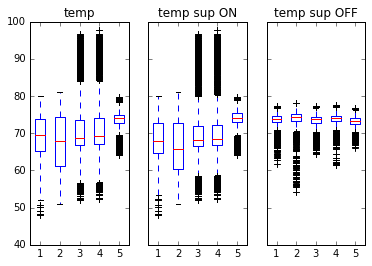

In [9]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
ax1.boxplot(data_temp)
ax2.boxplot(data_temp_1)
ax3.boxplot(data_temp_2)
ax1.set_title('temp')
ax2.set_title('temp sup ON')
ax3.set_title('temp sup OFF')
#plt.show()
plt.savefig(''.join(['temperature','_ahu_16']))

In [10]:
data_value = [ahu01['Cooling coil valve %open'],ahu01['Mixed air damper % open'],ahu01['Pre-heat coil discharger valve'],
              ahu01['re-heat coil 1 Discharger Valve'],ahu01['re-heat coil 2 Discharger Valve'],ahu01['Supply fan VFD speed']]
data_value_1 = [sup_on['Cooling coil valve %open'],sup_on['Mixed air damper % open'],sup_on['Pre-heat coil discharger valve'],
                sup_on['re-heat coil 1 Discharger Valve'],sup_on['re-heat coil 2 Discharger Valve'],sup_on['Supply fan VFD speed']]
data_value_2 = [sup_off['Cooling coil valve %open'],sup_off['Mixed air damper % open'],sup_off['Pre-heat coil discharger valve'],
                sup_off['re-heat coil 1 Discharger Valve'],sup_off['re-heat coil 2 Discharger Valve'],sup_off['Supply fan VFD speed']]

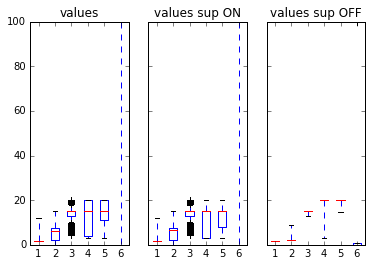

In [13]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
ax1.boxplot(data_value)
ax2.boxplot(data_value_1)
ax3.boxplot(data_value_2)
ax1.set_title('values')
ax2.set_title('values sup ON')
ax3.set_title('values sup OFF')
plt.savefig(''.join(['values%','_ahu_16']))

In [15]:
df1 = ahu01.copy()
print ahu01.columns.values
df1 = df1.drop(['Date','Time','supply fan ON?OFF', 'exhaust fans ON?OFF'],1)
print df1.columns.values

['Date' 'Time' 'Cooling coil valve %open' 'Mixed air damper % open'
 'Mixed air temperature' 'Pre-heat coil discharger temperature'
 'Pre-heat coil discharger valve' 're-heat coil 1 Discharger temperature'
 're-heat coil 1 Discharger Valve' 're-heat coil 2 Discharger temperature'
 're-heat coil 2 Discharger Valve' 'supply fan ON?OFF'
 'Supply fan VFD speed' 'exhaust fans ON?OFF' 'Return air temperature']
['Cooling coil valve %open' 'Mixed air damper % open'
 'Mixed air temperature' 'Pre-heat coil discharger temperature'
 'Pre-heat coil discharger valve' 're-heat coil 1 Discharger temperature'
 're-heat coil 1 Discharger Valve' 're-heat coil 2 Discharger temperature'
 're-heat coil 2 Discharger Valve' 'Supply fan VFD speed'
 'Return air temperature']


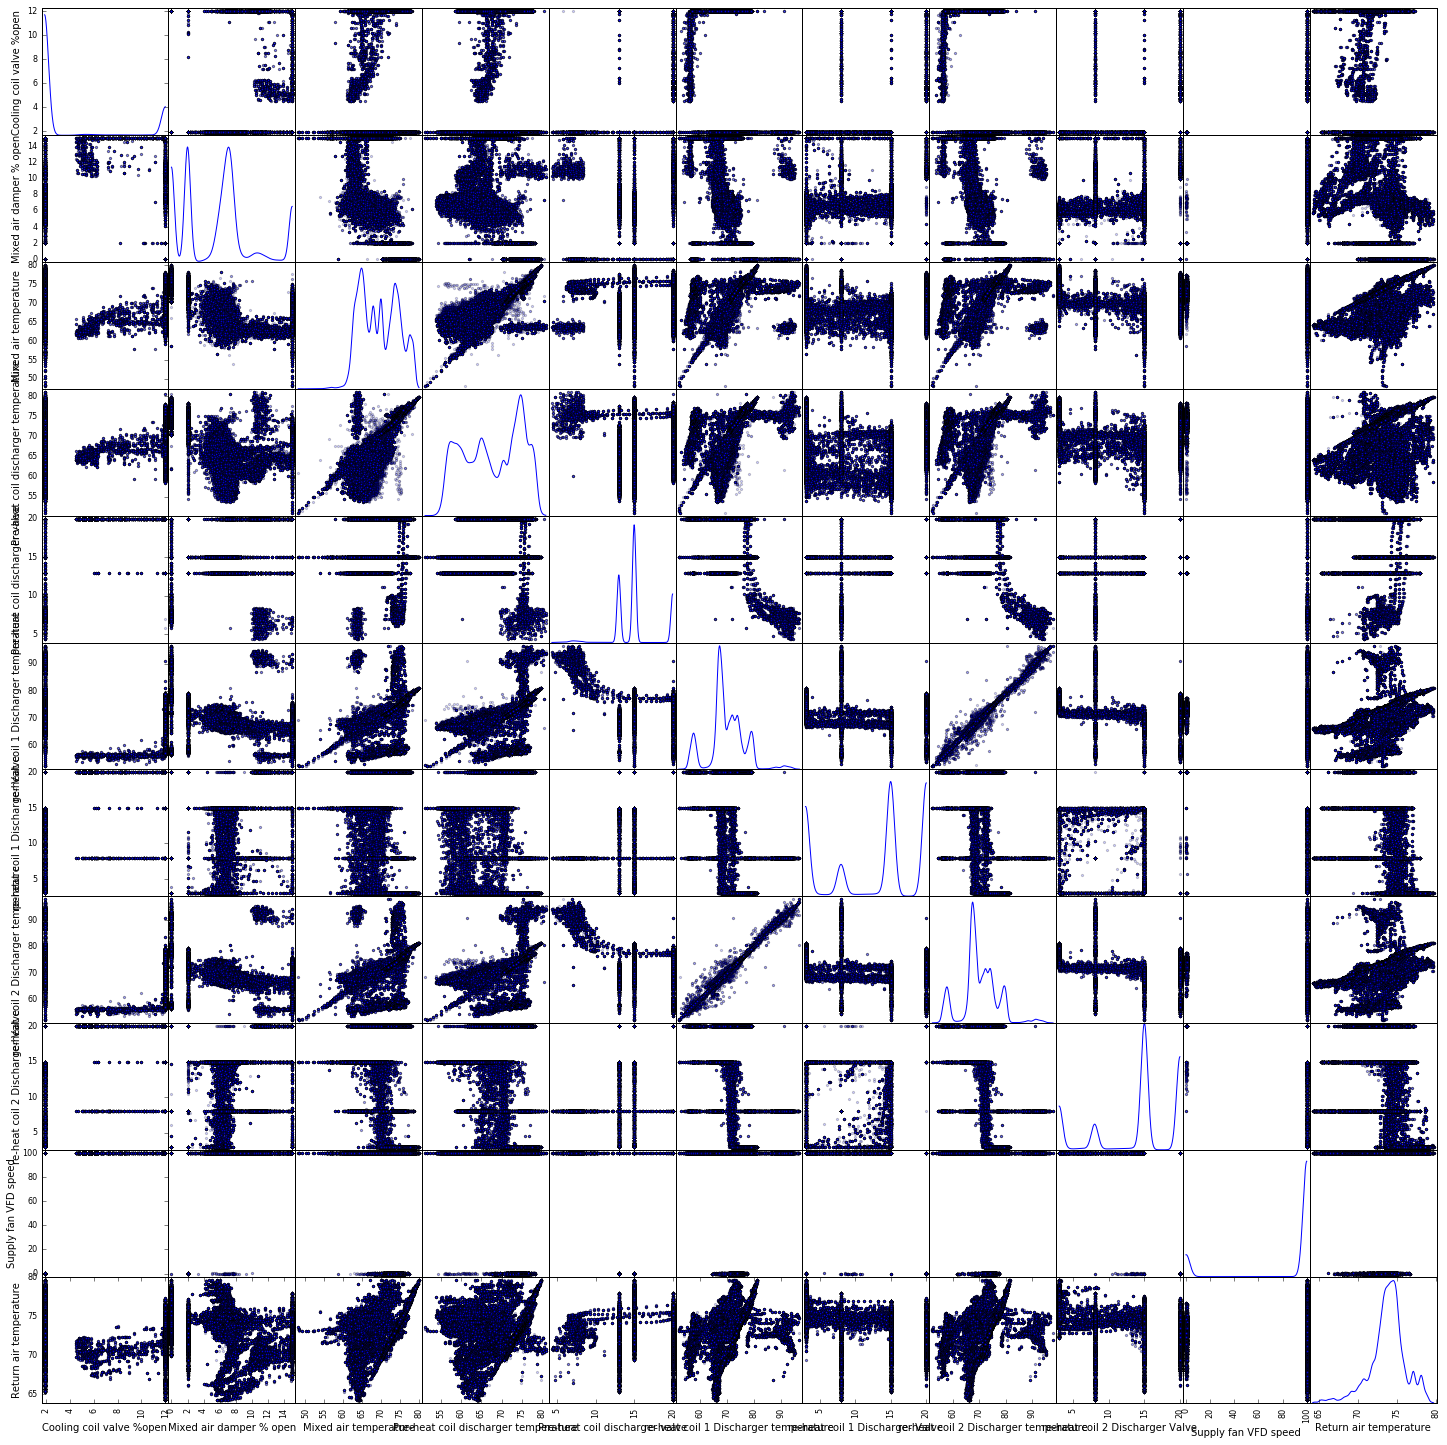

In [16]:
df = pd.scatter_matrix(df1, alpha = 0.2, figsize = (25,25), diagonal = 'kde')
#df.plot()
plt.savefig(''.join(['bivariate','_ahu_16']))